In [62]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# 弱大数定律

https://en.wikipedia.org/wiki/Law_of_large_numbers#Differences_between_the_weak_law_and_the_strong_law
https://math.stackexchange.com/questions/2024255/what-is-the-difference-between-the-weak-and-strong-law-of-large-numbers
https://stats.stackexchange.com/questions/205496/intuition-behind-strong-vs-weak-laws-of-large-numbers-with-an-r-simulation
https://blog.csdn.net/luixiao1220/article/details/100170497 弱大数定律的例子不对, setting是均值序列, 而不是单个的随机变量.

## 均匀分布

In [63]:
np.random.seed(20220223)

In [64]:
# 均匀分布, 强弱大数定律都满足
n = 10000
M = 10000
sample = stats.uniform.rvs(0,1,size = (n,M))
numbers_of_rvs = np.arange(n)+1
sample_mean_series = np.apply_along_axis(lambda x: x/numbers_of_rvs, axis = 0, arr= sample.cumsum(axis = 0))

画出单个序列的样本均值走势图

(0.45, 0.55)

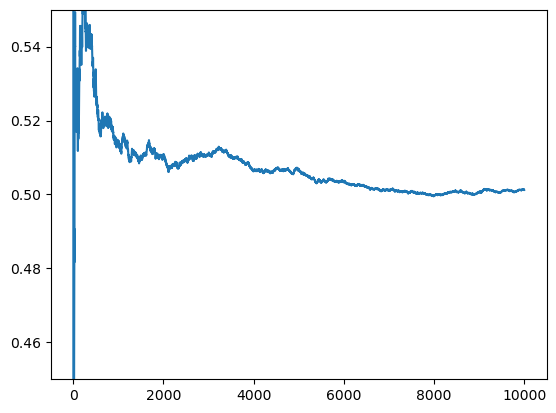

In [65]:
plt.plot(numbers_of_rvs, sample_mean_series[:,0])
plt.ylim(0.45,0.55)

指定一个界限eps, 根据10000条序列, 计算序列越过界限的概率. 这里我们用10000条序列的平均值计算概率序列, 因为样本有随机性, 所以图里面的线段在抖动. 但是, 我们可以看到概率序列正在收敛到1

In [66]:
eps = 0.02
mu = 0.5
prob_seq = (abs(sample_mean_series-mu)<eps).mean(axis = 1)

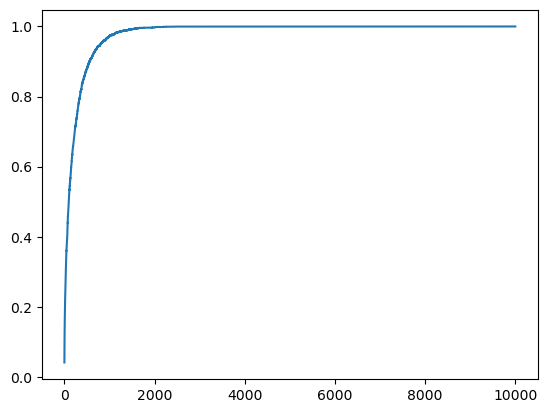

In [67]:
plt.plot(numbers_of_rvs, prob_seq)

## 特殊分布

In [71]:
# 均匀分布, 强弱大数定律都满足
n = 10000
M = 10000
sample = stats.expon.rvs(1,size = (n,M))
sample = np.sin(sample)*np.exp(sample)/sample
# sample = sample/sample.std()
numbers_of_rvs = np.arange(n)+1
sample_mean_series = np.apply_along_axis(lambda x: x/numbers_of_rvs, axis = 0, arr= sample.cumsum(axis = 0))

画出单个序列的样本均值走势图

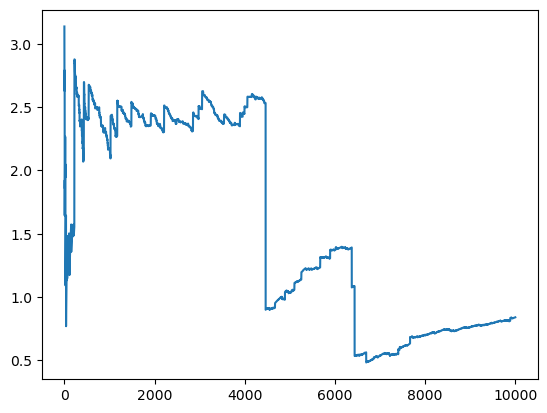

In [72]:
plt.plot(numbers_of_rvs, sample_mean_series[:,0])
# plt.ylim(sample_mean_series[-1,0] - 3*sample_mean_series[-1,:].std(),
#         sample_mean_series[-1,0] + 3*sample_mean_series[-1,:].std())

指定一个界限eps, 根据10000条序列, 计算序列越过界限的概率. 这里我们用10000条序列的平均值计算概率序列, 因为样本有随机性, 所以图里面的线段在抖动. 但是, 我们可以看到概率序列没有收敛到1

Text(0.5, 0.98, '$\\epsilon$ vs. Simulated Convergence Probability')

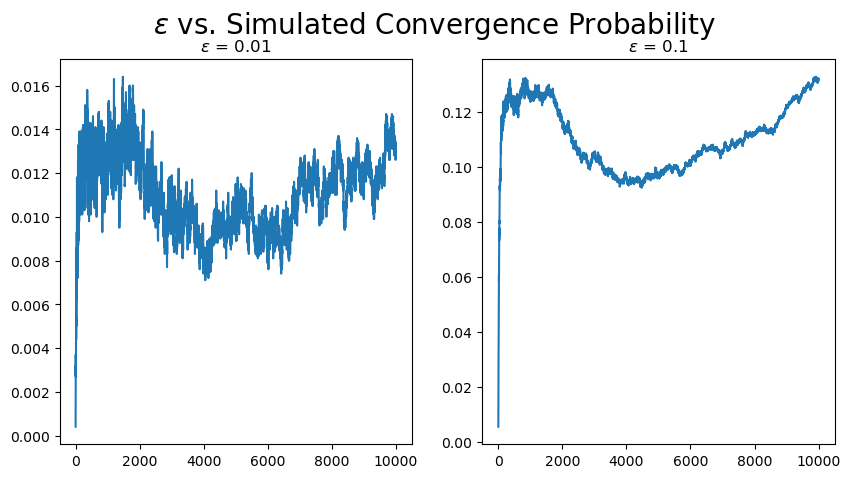

In [73]:
fig = plt.figure(figsize=(10,5))
# add fig 1
eps = 0.01
mu = np.pi/2
prob_seq = (abs(sample_mean_series-mu)<eps).mean(axis = 1)
fig.add_subplot(121, title="$\epsilon$ = 0.01")
plt.plot(numbers_of_rvs, prob_seq)
# add fig 2
eps = 0.1
mu = np.pi/2
prob_seq = (abs(sample_mean_series-mu)<eps).mean(axis = 1)
fig.add_subplot(122, title="$\epsilon$ = 0.1")
plt.plot(numbers_of_rvs, prob_seq)
# add super title
plt.suptitle('$\epsilon$ vs. Simulated Convergence Probability',fontsize=20)

# 强大数定律

## 均匀分布

先看10000条样本均值序列的收敛情况, 发现随机变量的值似乎经过某个点(样本量)之后, 序列就完全进入到一个领域内, 不再跳出了. 如果序列在某个点之后不再离开该领域, 这就是数学上的序列收敛定义了.事实上真的是这样吗? 

In [47]:
# 均匀分布, 强弱大数定律都满足
n = 10000
M = 10000
sample = stats.uniform.rvs(0,1,size = (n,M))
numbers_of_rvs = np.arange(n)+1
sample_mean_series = np.apply_along_axis(lambda x: x/numbers_of_rvs, axis = 0, arr= sample.cumsum(axis = 0))

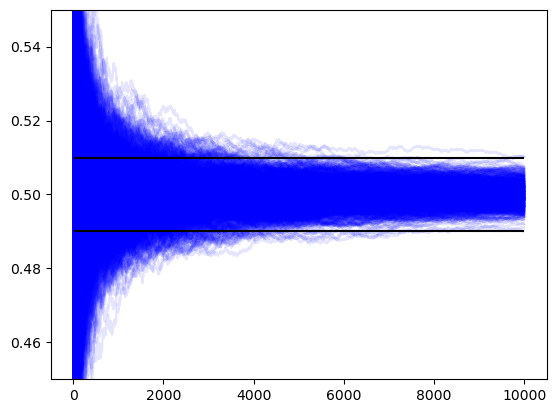

In [68]:
for i in range(1000):
# for i in range(10):
    plt.plot(numbers_of_rvs, sample_mean_series[:,i], color = 'blue',alpha =0.1)
plt.ylim(0.45,0.55)
plt.hlines(0.49, xmin = 1, xmax = numbers_of_rvs.max(),color = 'black')
plt.hlines(0.51, xmin = 1, xmax = numbers_of_rvs.max(),color = 'black')

我们按照强大数定律的定义, 来考察这件事情.定义事件A: 
$$\lim_{n \to \inf} |X_n-0.5| < \epsilon$$
不失一般性, 我们令$\epsilon = 0.01$. 我们观察事件A发生的概率如何, 我们借助10000条均值序列来估计事件A的发生概率.

In [69]:
eps = 0.02
mu = 0.5
boolean_mat = (sample_mean_series-mu)<eps
prob_est_strong = []
for start_point in numbers_of_rvs[::10]:
    prob_est_strong.append(boolean_mat[(start_point-1)::,].all(axis = 0).mean())
prob_est_strong = np.array(prob_est_strong)

(0.98, 1.01)

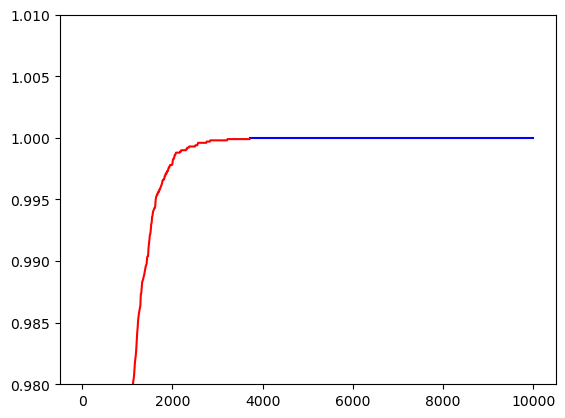

In [70]:
blue_index = np.where(np.array(prob_est_strong) == 1, True, False)
plt.plot(numbers_of_rvs[::10][blue_index], prob_est_strong[blue_index], color = 'blue')
plt.plot(numbers_of_rvs[::10][~blue_index], prob_est_strong[~blue_index], color = 'red')
plt.ylim(0.98,1.01)
# plt.hlines(y = 1, color = color_list, xmin = numbers_of_rvs[::100].min(), xmax = numbers_of_rvs[::100].max())

## 特殊分布

先看10000条样本均值序列的收敛情况, 发现随机变量的值似乎经过某个点(样本量)之后, 序列没有完全进入到一个领域内, 会存在一些次数的跳出. 跳出的次数仍然可以是无限次, 只要跳出的概率是0即可. 那么, 序列跳出领域的概率是0吗?

In [57]:
# 均匀分布, 强弱大数定律都满足
n = 10000
M = 10000
sample = stats.expon.rvs(1,size = (n,M))
sample = np.sin(sample)*np.exp(sample)/sample
# sample = sample/sample.std()
numbers_of_rvs = np.arange(n)+1
sample_mean_series = np.apply_along_axis(lambda x: x/numbers_of_rvs, axis = 0, arr= sample.cumsum(axis = 0))

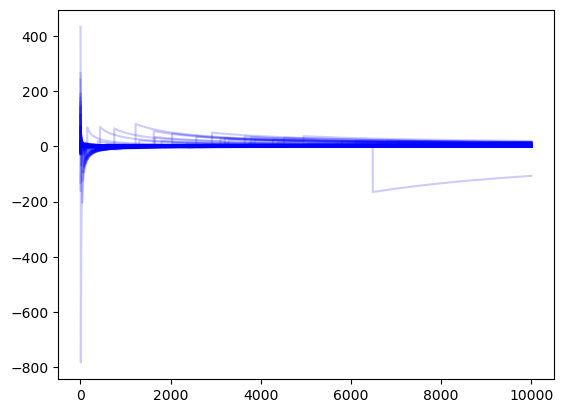

In [74]:
for i in range(1000):
# for i in range(10):
    plt.plot(numbers_of_rvs, sample_mean_series[:,i], color = 'blue',alpha =0.2)
# plt.ylim(0.45,0.55)
# plt.hlines(0.49, xmin = 1, xmax = numbers_of_rvs.max(),color = 'black')
# plt.hlines(0.51, xmin = 1, xmax = numbers_of_rvs.max(),color = 'black')

我们按照强大数定律的定义, 来考察这件事情.定义事件A: 
$$\lim_{n \to \inf} |X_n-\mu| < \epsilon$$
不失一般性, 我们令$\epsilon = 0.01$. 我们观察事件A发生的概率如何, 我们借助10000条均值序列来估计事件A的发生概率.

In [78]:
eps = 1.5
mu = np.pi/2
boolean_mat = (sample_mean_series-mu)<eps
prob_est_strong = []
for start_point in numbers_of_rvs[::10]:
    prob_est_strong.append(boolean_mat[(start_point-1)::,].all(axis = 0).mean())
prob_est_strong = np.array(prob_est_strong)

In [79]:
prob_est_strong

array([0.3535, 0.5674, 0.5747, 0.5821, 0.588 , 0.5946, 0.6022, 0.6067,
       0.6135, 0.62  , 0.6261, 0.6328, 0.6397, 0.646 , 0.652 , 0.6578,
       0.6644, 0.6714, 0.6794, 0.6867, 0.6941, 0.7014, 0.7085, 0.7168,
       0.725 , 0.7336, 0.7415, 0.748 , 0.7534, 0.7571, 0.7626, 0.7693,
       0.774 , 0.7785, 0.7825, 0.786 , 0.7913, 0.7957, 0.7986, 0.8024,
       0.806 , 0.8098, 0.8121, 0.8152, 0.8186, 0.8215, 0.8249, 0.8279,
       0.8312, 0.8338, 0.837 , 0.8409, 0.8429, 0.8451, 0.8483, 0.85  ,
       0.8524, 0.8542, 0.8561, 0.8586, 0.8611, 0.8629, 0.8643, 0.8658,
       0.8671, 0.8686, 0.8704, 0.8717, 0.8734, 0.8751, 0.8768, 0.8782,
       0.8791, 0.8801, 0.8814, 0.8831, 0.8846, 0.8855, 0.8865, 0.8878,
       0.8887, 0.8906, 0.8919, 0.8926, 0.8942, 0.895 , 0.8958, 0.8972,
       0.8979, 0.8992, 0.9002, 0.901 , 0.9015, 0.9021, 0.9031, 0.9038,
       0.9049, 0.9055, 0.9058, 0.907 , 0.9076, 0.9083, 0.9091, 0.9096,
       0.9106, 0.9117, 0.9127, 0.9129, 0.9135, 0.914 , 0.9146, 0.9151,
      

把$\epsilon$调整为10, 图中看起来序列正在收敛, 但线条还是红色, 说明最终也不是概率1满足的(almost surely). 因此这个序列并不满足强大数定律. 理论上需要进行严格的证明, 画图只是进行示意.

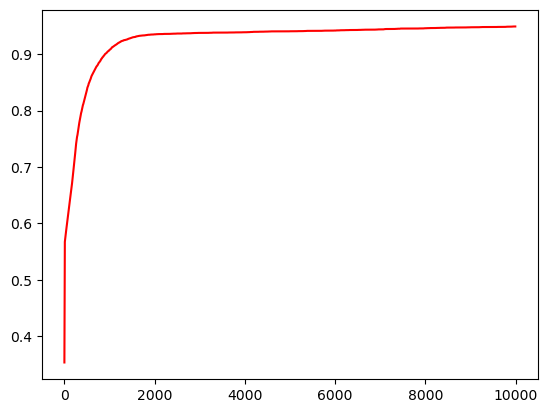

In [80]:
blue_index = np.where(np.array(prob_est_strong) == 1, True, False)
plt.plot(numbers_of_rvs[::10][blue_index], prob_est_strong[blue_index], color = 'blue')
plt.plot(numbers_of_rvs[::10][~blue_index], prob_est_strong[~blue_index], color = 'red')
# plt.ylim(0.98,1.01)
# plt.hlines(y = 1, color = color_list, xmin = numbers_of_rvs[::100].min(), xmax = numbers_of_rvs[::100].max())

# compare different estimator
https://stats.stackexchange.com/questions/321659/how-to-prove-that-one-mean-estimator-converges-faster-than-another

In [16]:
def ext_est(x):
    return (min(x) + max(x))/2

In [17]:
sample = stats.uniform.rvs(0,10,size = (1000,10000)) # 1000 sample, 10000 times simulation

In [18]:
# unbiasness checked through 10000 simulations
sample.mean(axis = 0).mean(),np.median(sample, axis = 0).mean(),np.apply_along_axis(ext_est, 0 ,sample).mean()

(4.999941534728099, 4.999593707791259, 4.999970928435073)

In [19]:
# sd comparation through 10000 simulations
sample.mean(axis = 0).std(),np.median(sample, axis = 0).std(),np.apply_along_axis(ext_est, 0 ,sample).std()

(0.09101124553210192, 0.1573245606751655, 0.007009158621117756)

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

# 1. 获取 QQQ 从 2023-01-01 到 2024-12-31 的历史数据
ticker = "QQQ"
start_date = "2000-01-01"
end_date = "2024-12-31"

# 下载数据
df = yf.download(ticker, start=start_date, end=end_date)

df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# 2. 计算每日涨跌幅 (百分比)
df['Daily_Return'] = df['Close'].pct_change() * 100

# 3. 去除首行 NaN 值
df = df.dropna(subset=['Daily_Return'])

# 4. 计算分位数
q5 = np.percentile(df['Daily_Return'], 5)
q10 = np.percentile(df['Daily_Return'], 10)
q50 = np.percentile(df['Daily_Return'], 50)
q90 = np.percentile(df['Daily_Return'], 90)
q95 = np.percentile(df['Daily_Return'], 95)

# 5. 输出结果
print(f"QQQ 每日涨跌幅分位数（2023-01-01 ~ 2024-12-31）：")
print(f"Q5: {q5:.3f}%")
print(f"Q10: {q10:.3f}%")
print(f"Q50 (中位数): {q50:.3f}%")
print(f"Q90: {q90:.3f}%")
print(f"Q95: {q95:.3f}%")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

QQQ 每日涨跌幅分位数（2023-01-01 ~ 2024-12-31）：
Q5: -2.727%
Q10: -1.822%
Q50 (中位数): 0.108%
Q90: 1.688%
Q95: 2.469%


In [8]:
df['Daily_Return'].mean(), df['Daily_Return'].std()

(0.04400848996361863, 1.7015042169273693)

<Axes: >

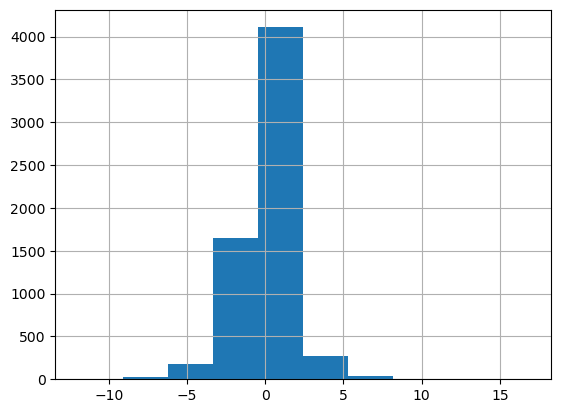

In [7]:
df['Daily_Return'].hist()

<Axes: xlabel='Date'>

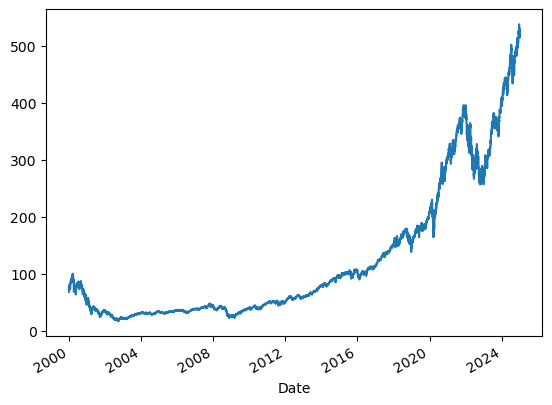

In [5]:
df.Close.plot()